In [1]:
import pandas as pd

In [2]:
#importing json file via pandas
df_json = pd.read_json('Output/assembled_data.json')
df_json["Dates"] = pd.to_datetime(df_json["Dates"])
df_json

,Dates,Average_Accomplishment_Business_Days
0,2026-01-03,0.125
1,2026-01-04,0.000
2,2026-01-05,0.125
3,2026-01-06,0.125
4,2026-01-07,0.125
5,2026-01-08,0.075
6,2026-01-09,0.075
7,2026-01-10,0.125
8,2026-01-11,0.000
9,2026-01-12,0.145


In [3]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Dates                                 14 non-null     datetime64[ns]
 1   Average_Accomplishment_Business_Days  14 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 356.0 bytes


In [4]:
#generating date range for the x-axis
date_range = pd.date_range(start='2026-01-01', end='2026-06-30', freq='D')
df_daterange = pd.DataFrame({"Dates": date_range})

In [5]:
df_daterange

,Dates
0,2026-01-01
1,2026-01-02
2,2026-01-03
3,2026-01-04
4,2026-01-05
...,...
176,2026-06-26
177,2026-06-27
178,2026-06-28
179,2026-06-29


In [6]:
df_merged = pd.merge(df_daterange, df_json, on="Dates", how="left")

In [7]:
df_merged

,Dates,Average_Accomplishment_Business_Days
0,2026-01-01,NaN
1,2026-01-02,NaN
2,2026-01-03,0.125
3,2026-01-04,0.000
4,2026-01-05,0.125
...,...,...
176,2026-06-26,NaN
177,2026-06-27,NaN
178,2026-06-28,NaN
179,2026-06-29,NaN


In [8]:
#fille missing values with 0
df_merged["Average_Accomplishment_Business_Days"] = df_merged["Average_Accomplishment_Business_Days"].fillna(0)
df_merged

,Dates,Average_Accomplishment_Business_Days
0,2026-01-01,0.000
1,2026-01-02,0.000
2,2026-01-03,0.125
3,2026-01-04,0.000
4,2026-01-05,0.125
...,...,...
176,2026-06-26,0.000
177,2026-06-27,0.000
178,2026-06-28,0.000
179,2026-06-29,0.000


In [9]:
df_merged["Cummulative_Progress"]= df_merged["Average_Accomplishment_Business_Days"].cumsum()
df_merged

,Dates,Average_Accomplishment_Business_Days,Cummulative_Progress
0,2026-01-01,0.000,0.000
1,2026-01-02,0.000,0.000
2,2026-01-03,0.125,0.125
3,2026-01-04,0.000,0.125
4,2026-01-05,0.125,0.250
...,...,...,...
176,2026-06-26,0.000,1.000
177,2026-06-27,0.000,1.000
178,2026-06-28,0.000,1.000
179,2026-06-29,0.000,1.000


In [10]:
import matplotlib.pyplot as plt

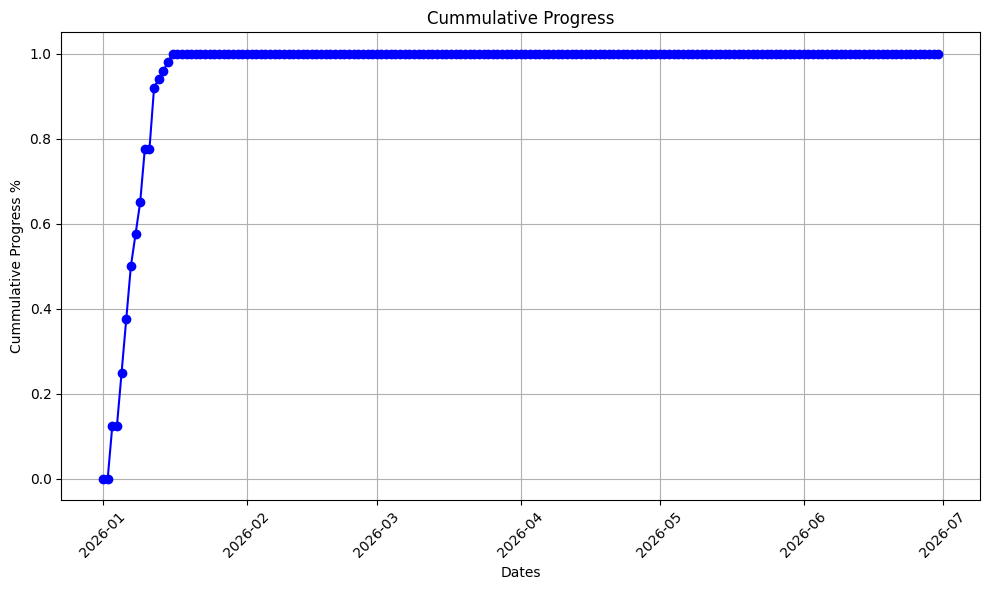

In [11]:
#sample plot
plt.figure(figsize=(10,6))
plt.plot(df_merged["Dates"], df_merged["Cummulative_Progress"], marker='o', linestyle='-', color='blue')

plt.title("Cummulative Progress")
plt.xlabel("Dates")
plt.ylabel("Cummulative Progress %")
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()